In [2]:
import json

In [3]:
annotation_path = "/road/road_trainval_v1.0.json"

ann_dict = json.loads(open(annotation_path, 'rb').read())

In [4]:
action_counts_2 = {}
for name, v in ann_dict['db'].items():
    if 'val_1' in v['split_ids']:
        for k, tube in v['action_tubes'].items():
            action_counts_2[tube['label_id']] = action_counts_2.get(tube['label_id'], 0) + len(tube['annos'])

In [6]:
for k, each in action_counts_2.items():
    print(ann_dict['all_action_labels'][k], each)

MovAway 14699
Stop 16895
MovTow 13921
Green 2810
TurLft 772
IncatLft 1884
Wait2X 819
MovRht 114
Mov 1587
PushObj 629
XingFmLft 2102
HazLit 1000
Ovtak 202
TurRht 704
Red 6309
XingFmRht 1360
IncatRht 2015
Amber 381
MovLft 153
Xing 337
Brake 1097
Rev 146


In [14]:
ann_dict['db']['2014-06-25-16-45-34_stereo_centre_02']['frames']['1']

{'annotated': 1,
 'rgb_image_id': 1,
 'width': 1280,
 'height': 960,
 'av_action_ids': [1],
 'annos': {'b01': {'box': [0.49769053117782913,
    0.40846153846153843,
    0.5348201977190377,
    0.47486849911014434],
   'agent_ids': [6],
   'loc_ids': [0],
   'action_ids': [8, 11],
   'duplex_ids': [91, 94],
   'triplet_ids': [1092, 1128],
   'tube_uid': '8258d065'},
  'b02': {'box': [0.528591925544685,
    0.44310658493177774,
    0.540698263555602,
    0.48538461538461536],
   'agent_ids': [2],
   'loc_ids': [0],
   'action_ids': [3],
   'duplex_ids': [25],
   'triplet_ids': [300],
   'tube_uid': 'c2b85678'}},
 'input_image_id': 1}

In [5]:
split = "train_1"
annotation_path = "/mnt/wato-drive/road/road_trainval_v1.0.json"
data = []
num_frames_in_clip = 91
fps = 12
with open(annotation_path, "r") as f:
            if split == "train_1":
                fs = f.read()
                ann_dict = json.loads(fs)
                for video in ann_dict['db'].keys():
                    if split not in ann_dict['db'][video]['split_ids']:
                        continue

                    for frame in ann_dict['db'][video]['frames'].values():
                        if not frame['annotated'] or len(frame['annos']) == 0:
                            continue
                        # Let's use this frame as a training point
                        dp = {}
                        frame_id = int(frame['input_image_id'])
                        if split == "val_1" and frame_id % 1 != 0:
                            continue
                        dp['video'] = video
                        dp['time'] = frame_id
                        dp['midframe'] = frame_id
                        dp['start_frame'] = max(0, frame_id - num_frames_in_clip // 2)
                        dp['n_frames'] = num_frames_in_clip
                        if dp['start_frame'] + dp['n_frames'] - 1 > ann_dict['db'][video]['numf']:
                            dp['n_frames'] = ann_dict['db'][video]['numf'] - dp['start_frame'] + 1
                        dp['format_str'] = '%05d.jpg'
                        dp['frame_rate'] = fps
                        dp['labels'] = []
                        assert len(frame['annos']) > 0, frame['annotated']
                        for annon in frame['annos'].values():
                            label = {'bounding_box': annon['box'], 'label': annon['action_ids']}
                            dp['labels'].append(label)
                        data.append(dp)

KeyboardInterrupt: 

In [33]:
for k, each in ann_dict['db'].items():
    if 'train_1' in each['split_ids']:
        print(k)

2014-06-25-16-45-34_stereo_centre_02
2014-07-14-14-49-50_stereo_centre_01
2014-07-14-15-42-55_stereo_centre_03
2014-08-08-13-15-11_stereo_centre_01
2014-08-11-10-59-18_stereo_centre_02
2014-11-14-16-34-33_stereo_centre_06
2014-11-18-13-20-12_stereo_centre_05
2014-11-21-16-07-03_stereo_centre_01
2014-12-09-13-21-02_stereo_centre_01
2015-02-03-08-45-10_stereo_centre_02
2015-02-03-19-43-11_stereo_centre_04
2015-02-06-13-57-16_stereo_centre_02
2015-02-13-09-16-26_stereo_centre_05
2015-02-24-12-32-19_stereo_centre_04
2015-03-03-11-31-36_stereo_centre_01


In [1]:
action_counts = {}
for name, v in ann_dict['db'].items():
    if 'train_1' in v['split_ids']:
        for k, frame in v['frames'].items():
            if 'annos' not in frame.keys():
                continue
            for j, anno in frame['annos'].items():
                for each in anno['action_ids']:
                    action_counts[each] = action_counts.get(each, 0) + 1

NameError: name 'ann_dict' is not defined

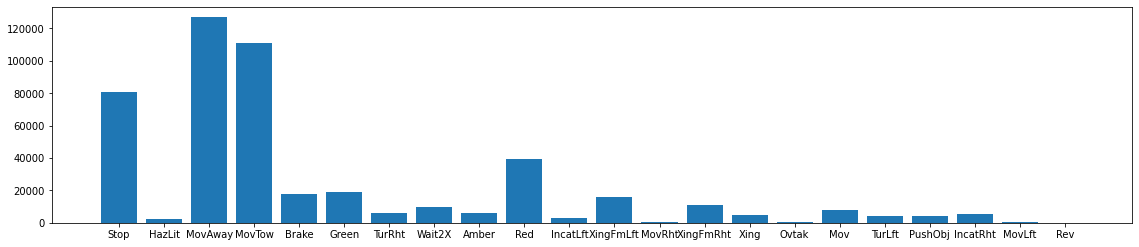

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.rcParams["figure.figsize"] = (15,10)

students = [23,17,35,29,12]
ax.bar(x,y)
plt.show()


In [7]:
x = []
y = []
for k, v in action_counts.items():
    print(ann_dict['all_action_labels'][k], v)
    x.append(ann_dict['all_action_labels'][k])
    y.append(v)
    #print(k, v, action_counts_2[k])
# verified!!!

Stop 80904
HazLit 2140
MovAway 127014
MovTow 111222
Brake 17958
Green 19310
TurRht 5858
Wait2X 9695
Amber 5808
Red 39406
IncatLft 3163
XingFmLft 15687
MovRht 253
XingFmRht 10813
Xing 4800
Ovtak 747
Mov 7782
TurLft 3953
PushObj 3896
IncatRht 5392
MovLft 230
Rev 39


In [100]:
print(ann_dict.keys())
ann_dict['all_action_labels'][21]

dict_keys(['all_input_labels', 'all_av_action_labels', 'av_action_labels', 'agent_labels', 'action_labels', 'duplex_labels', 'triplet_labels', 'loc_labels', 'old_loc_labels', 'db', 'label_types', 'all_duplex_labels', 'all_triplet_labels', 'all_agent_labels', 'all_loc_labels', 'all_action_labels', 'duplex_childs', 'triplet_childs'])


'PushObj'

In [77]:
action_counts

{8: 80904,
 11: 2140,
 3: 127014,
 4: 111222,
 7: 17958,
 2: 19310,
 13: 5858,
 17: 9695,
 1: 5808,
 0: 39406,
 9: 3163,
 18: 15687,
 14: 253,
 19: 10813,
 20: 4800,
 16: 747,
 5: 7782,
 12: 3953,
 21: 3896,
 10: 5392,
 15: 230,
 6: 39}

In [23]:
ann_dict['all_action_labels'][11]

'HazLit'

In [16]:
ann_dict['db']['2014-06-25-16-45-34_stereo_centre_02']['frames']['1']

{'annotated': 1,
 'rgb_image_id': 1,
 'width': 1280,
 'height': 960,
 'av_action_ids': [1],
 'annos': {'b01': {'box': [0.49769053117782913,
    0.40846153846153843,
    0.5348201977190377,
    0.47486849911014434],
   'agent_ids': [6],
   'loc_ids': [0],
   'action_ids': [8, 11],
   'duplex_ids': [91, 94],
   'triplet_ids': [1092, 1128],
   'tube_uid': '8258d065'},
  'b02': {'box': [0.528591925544685,
    0.44310658493177774,
    0.540698263555602,
    0.48538461538461536],
   'agent_ids': [2],
   'loc_ids': [0],
   'action_ids': [3],
   'duplex_ids': [25],
   'triplet_ids': [300],
   'tube_uid': 'c2b85678'}},
 'input_image_id': 1}

In [64]:
ann_dict['db']['2014-06-25-16-45-34_stereo_centre_02']['action_tubes']['dc4f39d3-004-01']

{'label_id': 4,
 'annos': {'2815': 'b8704',
  '2816': 'b8708',
  '2817': 'b8712',
  '2818': 'b8716',
  '2819': 'b8720',
  '2820': 'b8724',
  '2821': 'b8728',
  '2822': 'b8732',
  '2823': 'b8736',
  '2824': 'b8740',
  '2825': 'b8744',
  '2826': 'b8748',
  '2827': 'b8752',
  '2828': 'b8756',
  '2829': 'b8760',
  '2830': 'b8764',
  '2831': 'b8769',
  '2832': 'b8774',
  '2833': 'b8779',
  '2834': 'b8784',
  '2835': 'b8789',
  '2836': 'b8794',
  '2837': 'b8799',
  '2838': 'b8804',
  '2839': 'b8809',
  '2840': 'b8814',
  '2841': 'b8819',
  '2842': 'b8824',
  '2843': 'b8828',
  '2844': 'b8832',
  '2845': 'b8836',
  '2846': 'b8840',
  '2847': 'b8844',
  '2848': 'b8848',
  '2849': 'b8852',
  '2850': 'b8856',
  '2851': 'b8860',
  '2852': 'b8864',
  '2853': 'b8868',
  '2854': 'b8872',
  '2855': 'b8876',
  '2856': 'b8880',
  '2857': 'b8884',
  '2858': 'b8888',
  '2859': 'b8892',
  '2860': 'b8896',
  '2861': 'b8900',
  '2862': 'b8904',
  '2863': 'b8908',
  '2864': 'b8912',
  '2865': 'b8916',
  '286

In [18]:
ann_dict2 = json.loads(open("/mnt/wato-drive/road/annotations/tracking_all.json", "r").read())

In [26]:
with open("/mnt/wato-drive/road/detections/val1_coco.jsonl", "r") as f:
    ann3 = [json.loads(line) for line in f]


In [7]:
len(ann_dict['db']['2014-06-25-16-45-34_stereo_centre_02']['frames'])

4734

In [22]:
for each in ann_dict['db']:
    if 'train_1' in each['split_ids']:
        

dict_keys(['2014-06-25-16-45-34_stereo_centre_02', '2014-06-26-09-53-12_stereo_centre_02', '2014-07-14-14-49-50_stereo_centre_01', '2014-07-14-15-42-55_stereo_centre_03', '2014-08-08-13-15-11_stereo_centre_01', '2014-08-11-10-59-18_stereo_centre_02', '2014-11-14-16-34-33_stereo_centre_06', '2014-11-18-13-20-12_stereo_centre_05', '2014-11-21-16-07-03_stereo_centre_01', '2014-11-25-09-18-32_stereo_centre_04', '2014-12-09-13-21-02_stereo_centre_01', '2015-02-03-08-45-10_stereo_centre_02', '2015-02-03-19-43-11_stereo_centre_04', '2015-02-06-13-57-16_stereo_centre_02', '2015-02-13-09-16-26_stereo_centre_02', '2015-02-13-09-16-26_stereo_centre_05', '2015-02-24-12-32-19_stereo_centre_04', '2015-03-03-11-31-36_stereo_centre_01'])

In [33]:
valvideos = set([])
for each in ann3:
    valvideos.add(ann3[1]['frameName'].split('.')[0])

In [34]:
valvideos

{'2014-06-26-09-53-12_stereo_centre_02'}

In [8]:
videos = set([])
for each in data:
    videos.add(each['video'])

In [28]:
videos

{'2014-06-25-16-45-34_stereo_centre_02',
 '2014-07-14-14-49-50_stereo_centre_01',
 '2014-07-14-15-42-55_stereo_centre_03',
 '2014-08-08-13-15-11_stereo_centre_01',
 '2014-08-11-10-59-18_stereo_centre_02',
 '2014-11-14-16-34-33_stereo_centre_06',
 '2014-11-18-13-20-12_stereo_centre_05',
 '2014-11-21-16-07-03_stereo_centre_01',
 '2014-12-09-13-21-02_stereo_centre_01',
 '2015-02-03-08-45-10_stereo_centre_02',
 '2015-02-03-19-43-11_stereo_centre_04',
 '2015-02-06-13-57-16_stereo_centre_02',
 '2015-02-13-09-16-26_stereo_centre_05',
 '2015-02-24-12-32-19_stereo_centre_04',
 '2015-03-03-11-31-36_stereo_centre_01'}

FileNotFoundError: [Errno 2] No such file or directory: './road/cache/resnet50I3D512-Pkinetics-b4s8x1x1-roadt3-h3x3x3/detections-30-08-50/2014-06-25-16-45-34_stereo_centre_02/04131.pkl'